# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [59]:
# LONG WAY - by changing each column individually
df.rename(columns={'C/A' : 'c/a', 'UNIT' :'unit', 'SCP' : 'scp', 'STATION' : 'station',
                  'LINENAME' : 'linename', 'DIVISION' :'division', 'DATE' : 'date', 
                   'TIME' : 'time', 'DESC' : 'desc', 'ENTRIES' : 'entries', 'EXITS' : 'exits'})
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [60]:
df.columns = [col.strip() for col in df.columns]
# list comprehension (found online) to get rid of the white spaces after EXITS

In [61]:
# alternative
lowercase_columns = []
for col in df:
    lowercase_columns.append(col.lower())
        
lowercase_columns



['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits']

In [62]:
# Mass column name change
df.columns = lowercase_columns
df.head()
# note that I used a for loop to make a list of lowercase column names
# in order to change the column name, df.columns needs to be equal to
# the list of the new names

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [63]:
#Your code here
df = df.set_index('linename')
df.head()
# this takes out the index numbers and gives it a column name that exists

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [64]:
# Your code here
df = df.reset_index()
df.head()
# .reset_index changes the index back to what it was

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [65]:
# Your code here
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [66]:
def clean(col_name):
    cleaned = col_name.capitalize()
#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [67]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [68]:
# Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/a', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [69]:
# Your code here
df.Date = pd.to_datetime(df.Date)
# Dataframe name.column name = pd(because we're working in pandas).to_datetime(df.column name)

In [70]:
df['Dayofweek'] = df.Date.dt.dayofweek
# adding a column of Dayofweek to the dataframe.column name.dt.column
# note that dt stores all the built in datetime methods(only workds for datetime columns)

In [71]:
df.head()

,Linename,C/a,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_lines,Dayofweek
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5


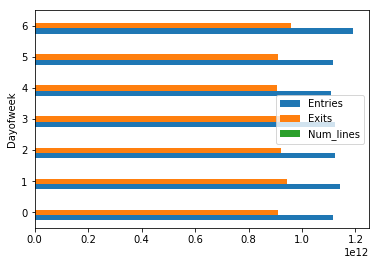

In [72]:
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh');

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [73]:
grouped = grouped.reset_index()
grouped.head()

,Dayofweek,Entries,Exits,Num_lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573


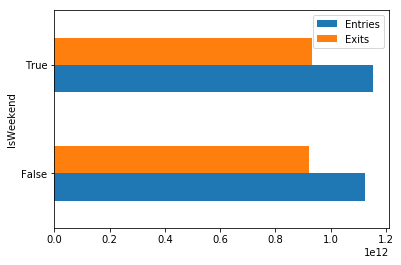

In [74]:
#Your code here
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['Entries', 'Exits']].plot(kind='barh');

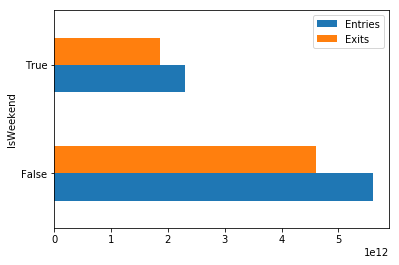

In [75]:
# What not to do
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').sum()
wkend[['Entries', 'Exits']].plot(kind='barh');

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [76]:
# Answer: The raw data for entries/exits is cumulative. 
# As such, you would first need to order the data by time and station, 
# and then calculate the difference in order to produce meaningful aggregations.

## Drop a couple of columns

In [77]:
# Your code here
df = df.drop(['C/a', 'Scp'], axis=1)
df.head()
# to drop multiple columns at once, you need to do df.drop([column names separated by commas], axis=1)

,Linename,Unit,Station,Division,Date,Time,Desc,Entries,Exits,Num_lines,Dayofweek
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,NQR456W,R051,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,NQR456W,R051,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,NQR456W,R051,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.